In [ ]:
from importlib import reload

from scipy import interpolate as spinterpolate

from matplotlib import pyplot as plt
import jax
from jax import numpy as jnp
jax.config.update("jax_enable_x64", True)

import nudging
reload(nudging)

import interpolate
reload(interpolate)

jndarray = jnp.ndarray

simulate_separate_interpolate = nudging.simulate_separate
plot_error = nudging.plot_error

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = jnp.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 5

t0, tf = 0, 200

# Cubic spline interpolation

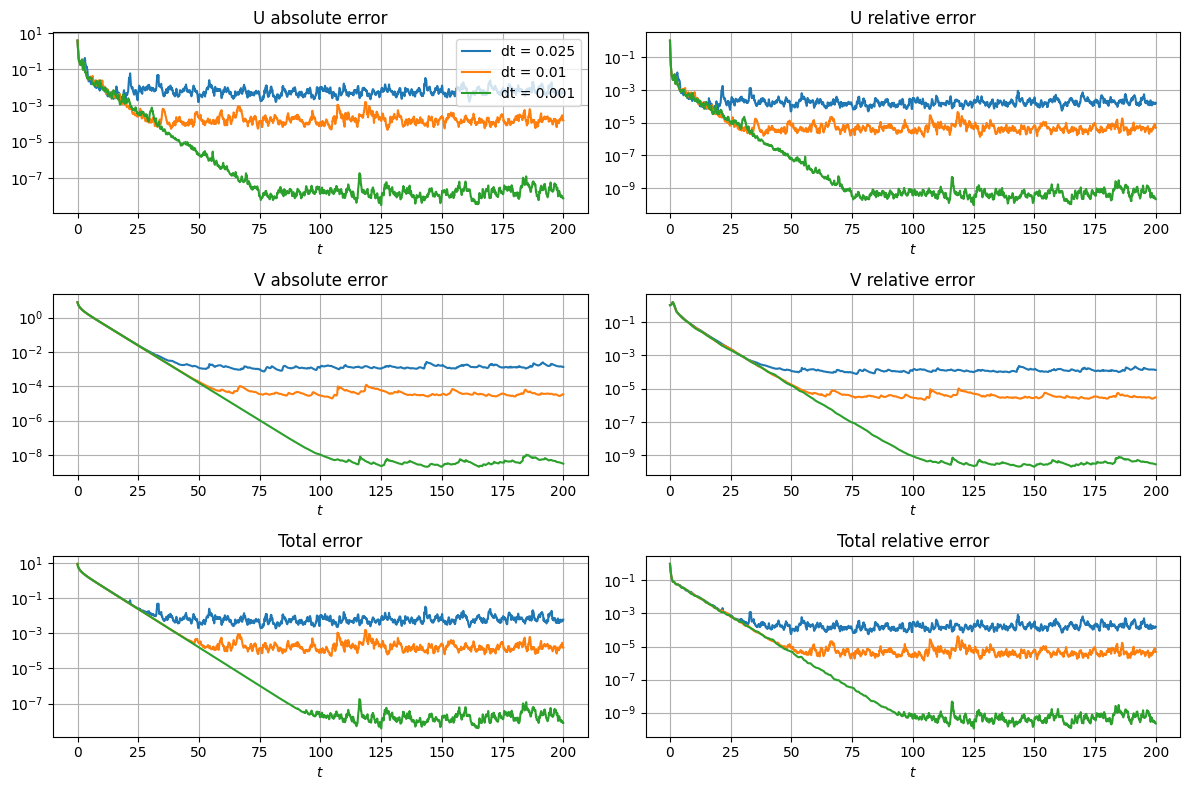

In [ ]:
system = interpolate.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = interpolate.RK4(system)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for dt in (0.025, 0.01, 0.001):
    U, V, Un, Vn = simulate_separate_interpolate(
        system, solver, t0, tf, dt, spinterpolate.CubicSpline
    )

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()

# Linear interpolation

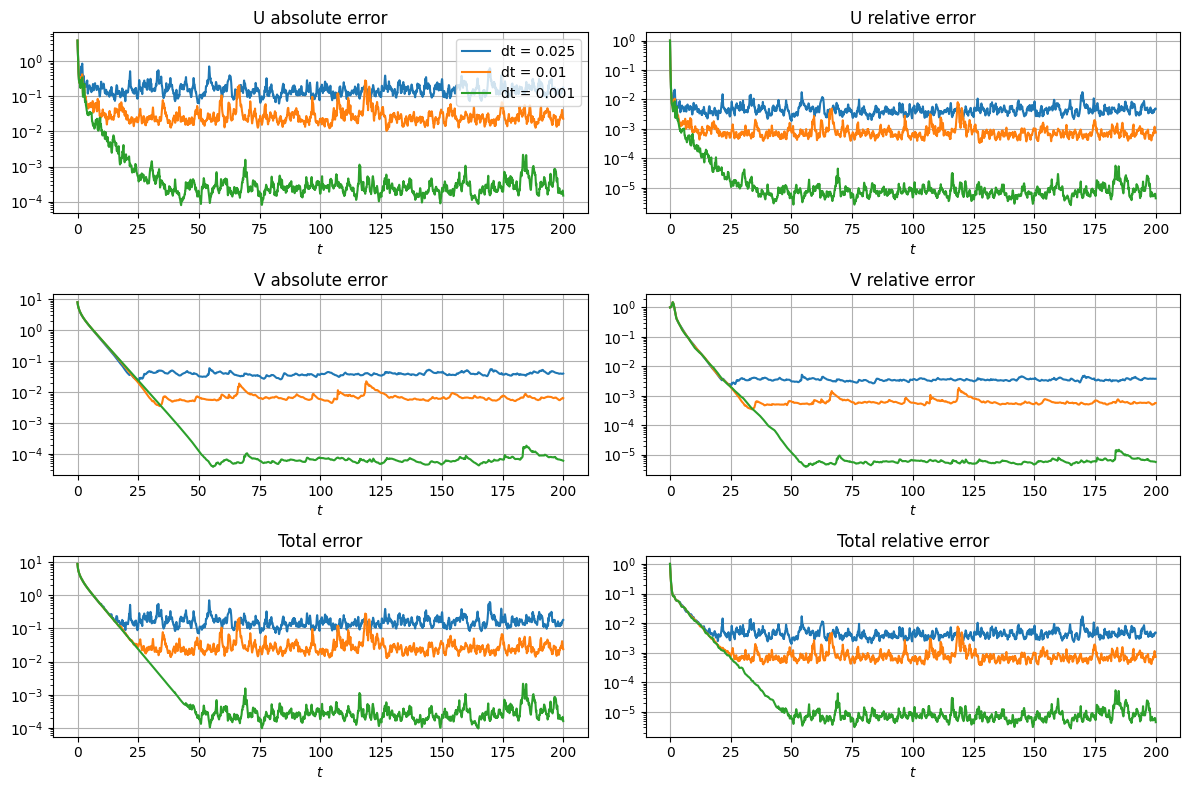

In [ ]:
system = interpolate.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = interpolate.RK4(system)

def interp_1d(_, U):
    return lambda _: (U[:-1] + U[1:]) / 2

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for dt in (0.025, 0.01, 0.001):
    U, V, Un, Vn = simulate_separate_interpolate(
        system, solver, t0, tf, dt, interp_1d
    )

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()

# Cubic spline interpolation (`make_interp_spline`)

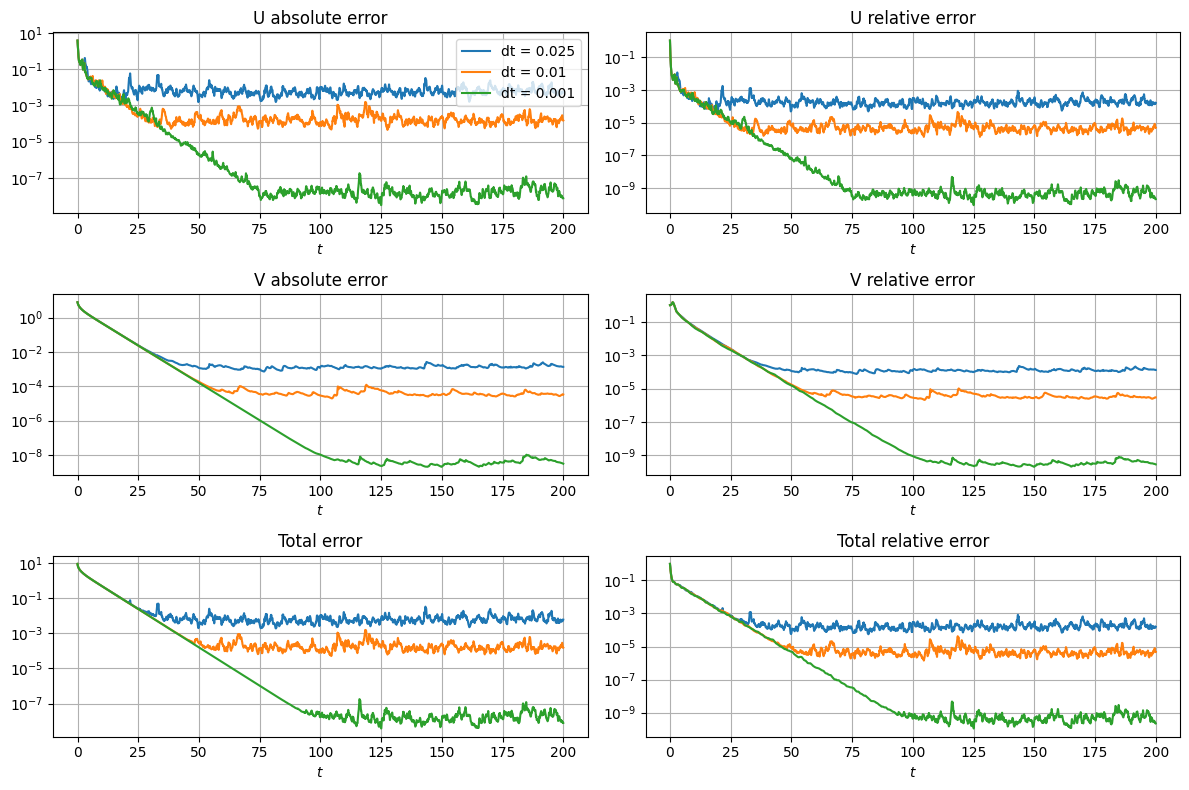

In [ ]:
system = interpolate.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = interpolate.RK4(system)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

spline_options = {
    "k": 3,
}

for dt in (0.025, 0.01, 0.001):
    U, V, Un, Vn = simulate_separate_interpolate(
        system,
        solver,
        t0,
        tf,
        dt,
        lambda tls, U_true: spinterpolate.make_interp_spline(
            tls, U_true, **spline_options
        ),
    )

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()

# Quintic spline interpolation (`make_interp_spline`)

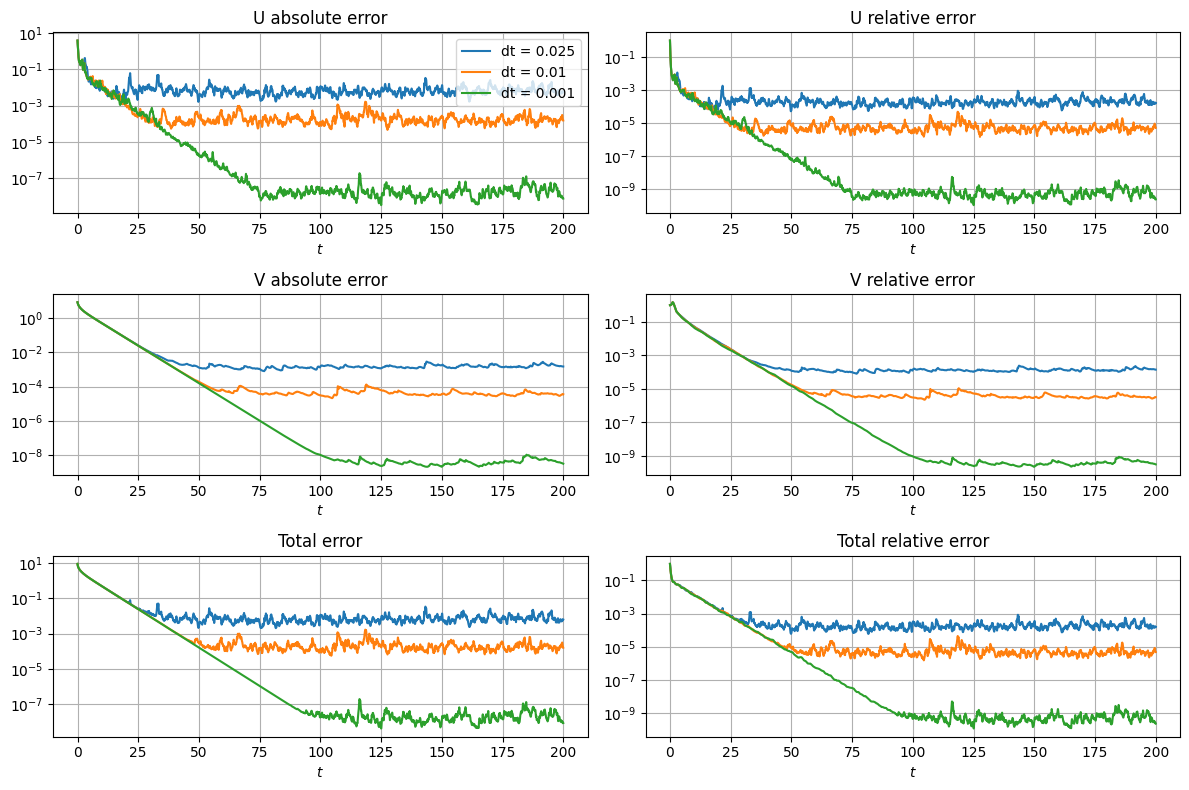

In [ ]:
system = interpolate.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = interpolate.RK4(system)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

spline_options = {
    "k": 5,
}

for dt in (0.025, 0.01, 0.001):
    U, V, Un, Vn = simulate_separate_interpolate(
        system,
        solver,
        t0,
        tf,
        dt,
        lambda tls, U_true: spinterpolate.make_interp_spline(
            tls, U_true, **spline_options
        ),
    )

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()

# Inferior spline methods

## Cubic spline interpolation (`RegularGridInterpolator`)

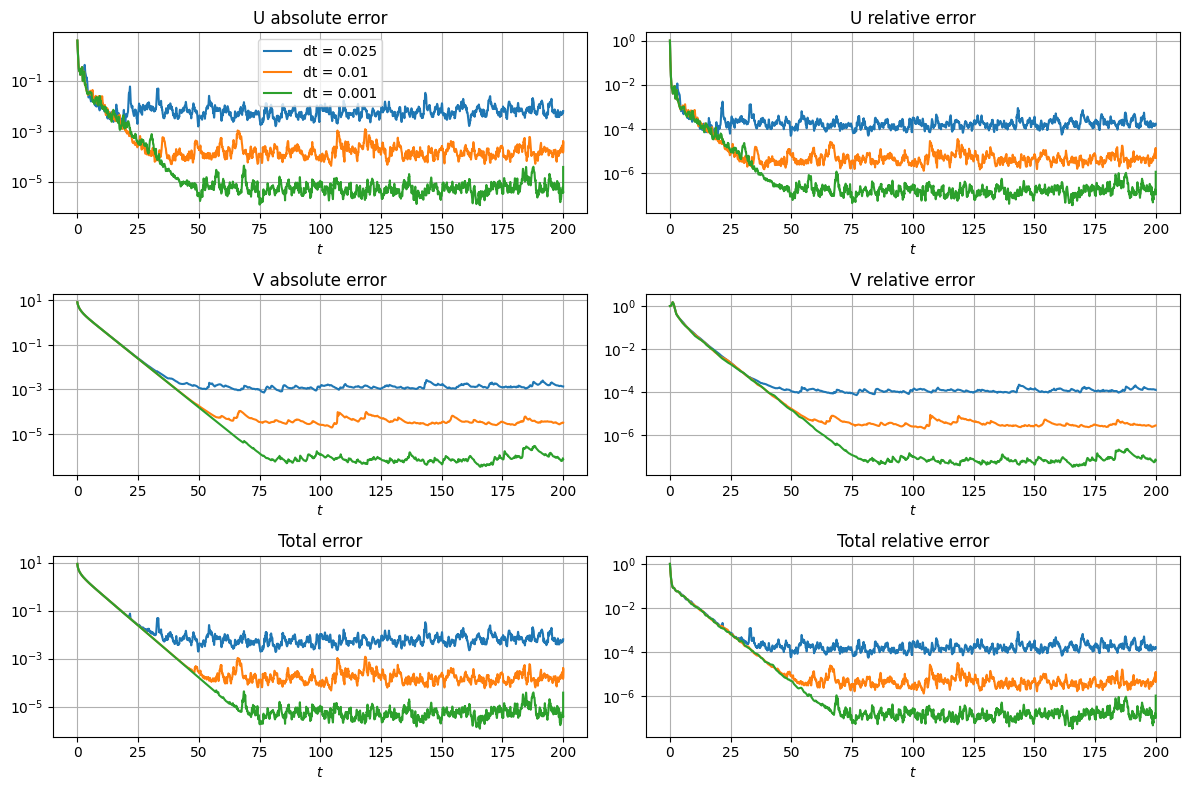

In [ ]:
system = interpolate.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = interpolate.RK4(system)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

spline_options = {
    "method": "cubic",
}

for dt in (0.025, 0.01, 0.001):
    U, V, Un, Vn = simulate_separate_interpolate(
        system,
        solver,
        t0,
        tf,
        dt,
        lambda tls, U_true: spinterpolate.RegularGridInterpolator(
            (tls,), U_true, **spline_options
        ),
    )

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()

## Quintic spline interpolation (`RegularGridInterpolator`)

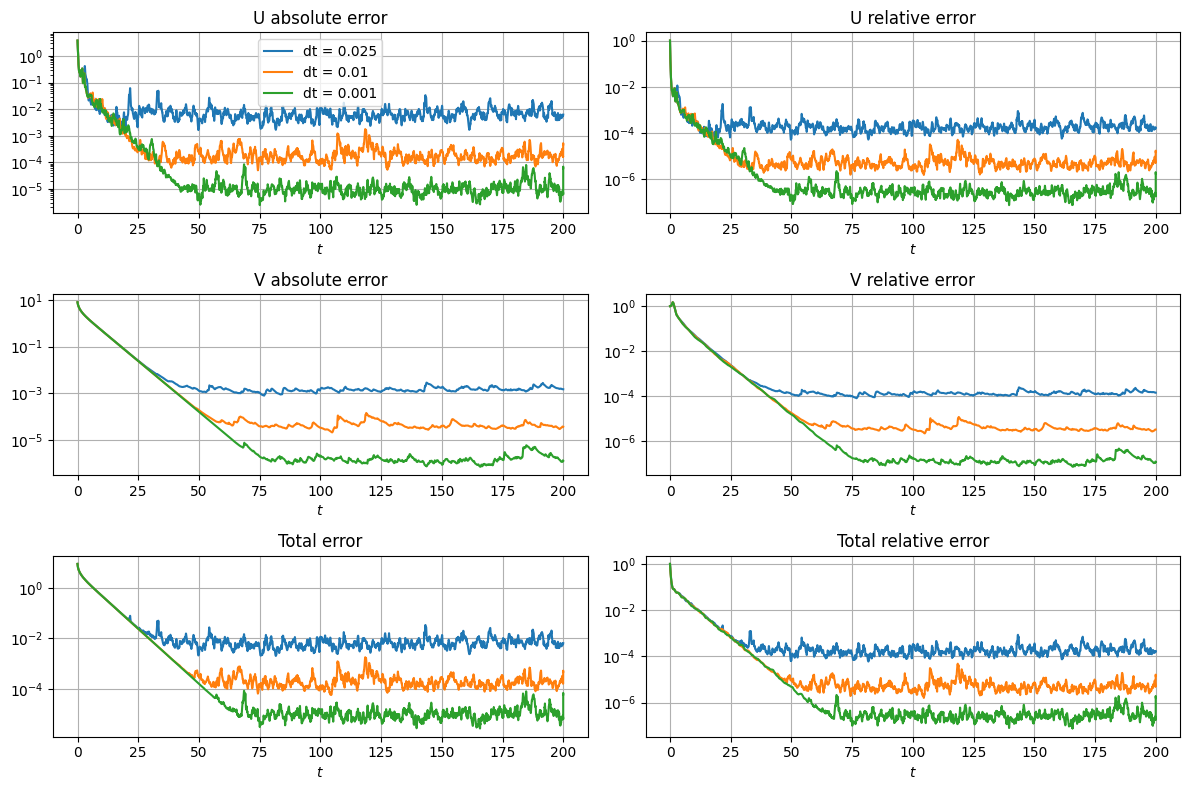

In [ ]:
system = interpolate.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = interpolate.RK4(system)

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

spline_options = {
    "method": "quintic",
}

for dt in (0.025, 0.01, 0.001):
    U, V, Un, Vn = simulate_separate_interpolate(
        system,
        solver,
        t0,
        tf,
        dt,
        lambda tls, U_true: spinterpolate.RegularGridInterpolator(
            (tls,), U_true, **spline_options
        ),
    )

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()